<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Compute_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import os                                               # to set current working directory
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from sklearn.cluster import KMeans                      # k-means clustering

In [2]:
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
#Load Data
data = load_digits().data
data.shape

(1797, 64)

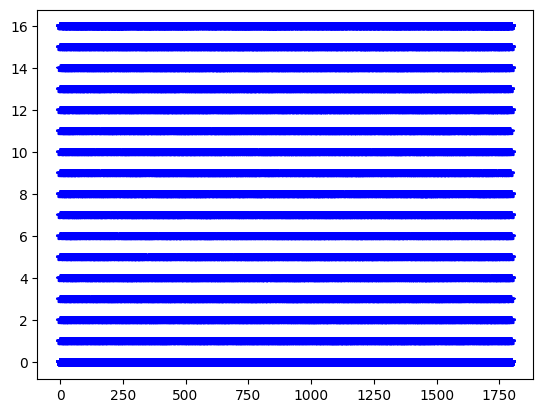

In [8]:
plt.plot(data,'b*');

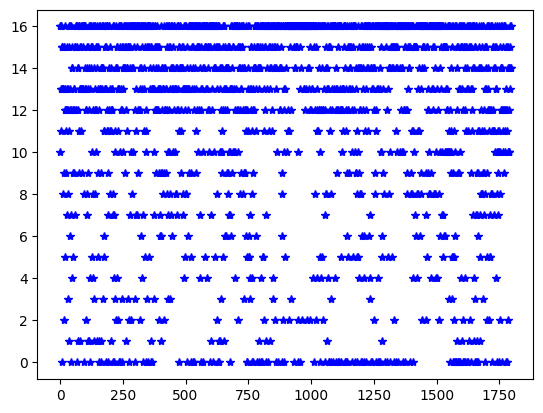

In [10]:
plt.plot(data[:,60],'b*')

In [11]:
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
df.shape

(1797, 2)

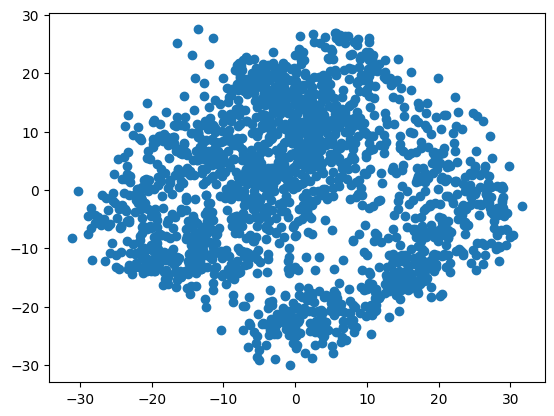

In [12]:
plt.scatter(df[:,0],df[:,1])

In [13]:
#Defining our function
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids
    centroids = x[idx, :] #Step 1

    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2

    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points, centroids

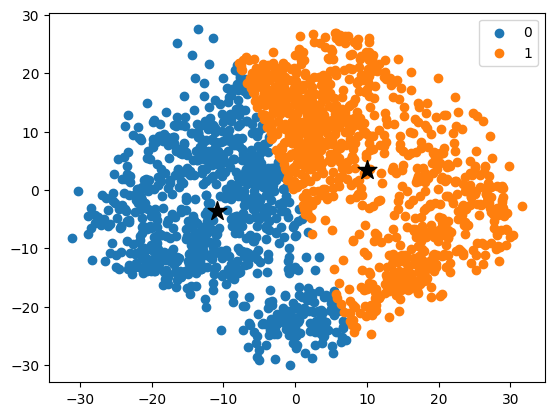

In [14]:
#Applying our function
label, centroids = kmeans(df,2,1)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()

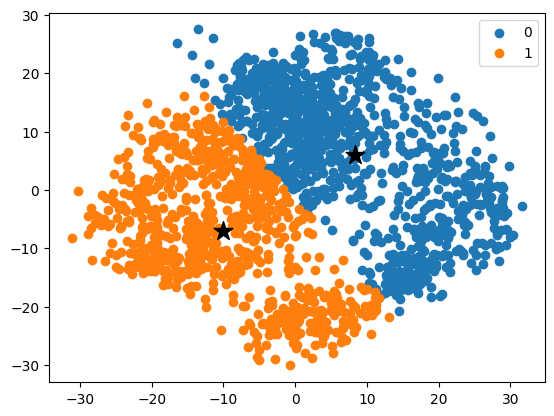

In [15]:
#Applying our function
label, centroids = kmeans(df,2,100)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()

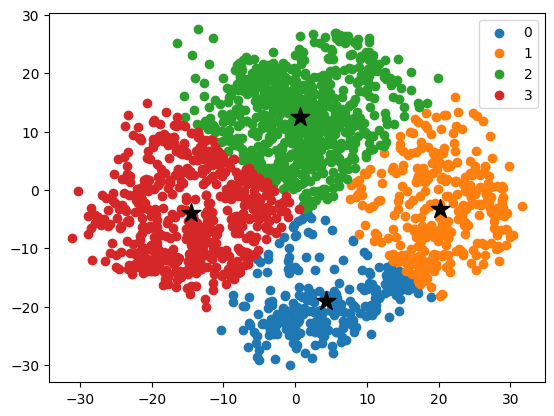

In [16]:
#Applying our function
label, centroids = kmeans(df,4,100)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()

In [17]:
centroids

array([[  4.26620411, -18.97534594],
       [ 20.18856758,  -3.30635098],
       [  0.71233071,  12.47791879],
       [-14.50644262,  -3.91915002]])

In [18]:
KM = KMeans(n_clusters=4)
model = KM.fit(df)
model.cluster_centers_

array([[-14.46900539,  -3.8181101 ],
       [ 20.182542  ,  -3.43889725],
       [  0.79432875,  12.51617158],
       [  4.10246606, -18.99616078]])

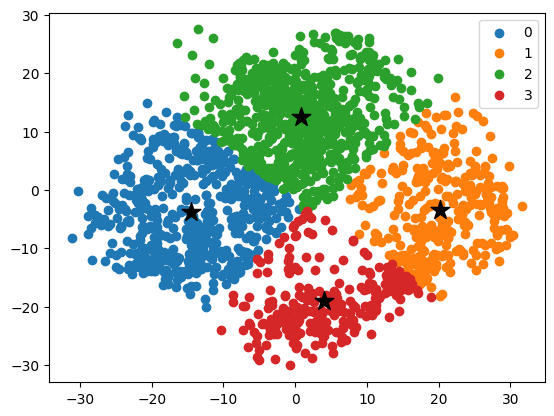

In [20]:
model.labels_
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(df[model.labels_ == i , 0] , df[model.labels_ == i , 1] , label = i)
    plt.scatter(model.cluster_centers_[i,0], model.cluster_centers_[i,1], marker='*', s=200, c='black')
plt.legend()
plt.show()


In [21]:
!pip install zarr
!pip install gcsfs
!pip install netcdf4

In [22]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


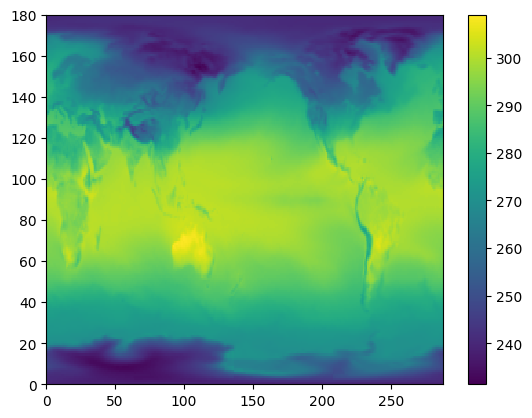

In [23]:
import xarray as xr
dd = df[(df.experiment_id == 'historical') & (df.institution_id == 'NOAA-GFDL') & (df.table_id == 'Amon') & (df.grid_label=='gr1') & (df.source_id == 'GFDL-ESM4') & (df.member_id == 'r1i1p1f1') & (df.variable_id == 'tas')]
ds1 = xr.open_zarr(
dd.zstore.iloc[0],
storage_options={'token': 'anon'},
consolidated=True,decode_times=False
)
plt.pcolormesh(ds1.tas[-1,:,:]);plt.colorbar()

In [24]:
ds1

<xarray.Dataset> Size: 411MB
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 1980)
Coordinates:
  * bnds       (bnds) float64 16B 1.0 2.0
    height     float64 8B ...
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) int64 16kB 0 708 1416 2148 ... 1443192 1443924 1444656
    time_bnds  (time, bnds) float64 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Data variables:
    tas        (time, lat, lon) float32 411MB dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/75e5c5a7-d7c4-4860-beb1-db454f25f13a...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-09-10;created;by nhn2@columbia.edu

In [36]:
df = ds1.tas[:,90:,:]
time = pd.date_range("1850-01-01", freq="M", periods=1980)
df['time'] = time
df

<ipython-input-36-d15a4cd1cb08>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range("1850-01-01", freq="M", periods=1980)


<xarray.DataArray 'tas' (time: 1980, lat: 90, lon: 288)> Size: 205MB
dask.array<getitem, shape=(1980, 90, 288), dtype=float32, chunksize=(600, 90, 288), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 720B 0.5 1.5 2.5 3.5 4.5 ... 85.5 86.5 87.5 88.5 89.5
  * lon      (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time     (time) datetime64[ns] 16kB 1850-01-31 1850-02-28 ... 2014-12-31
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [37]:
df = df.groupby('time.month').mean('time')
df.shape

(12, 90, 288)

In [38]:
df = df.stack(z=("lat", "lon"))

In [39]:
from sklearn.preprocessing import StandardScaler
# The main idea is to normalize/standardize i.e. μ = 0 and σ = 1 your features which are present in the dataset, individually, before applying any machine learning model.
X = StandardScaler().fit_transform(df.transpose()-273.15)
X.shape

(25920, 12)

In [40]:
KM = KMeans(n_clusters=10)
model = KM.fit(X)
centers = model.cluster_centers_
centers

array([[-1.36989152e+00, -1.42392182e+00, -1.53496027e+00,
        -1.56903291e+00, -1.47389328e+00, -1.44410658e+00,
        -1.54649913e+00, -1.55007160e+00, -1.49223590e+00,
        -1.50671804e+00, -1.45413828e+00, -1.39095914e+00],
       [ 7.69387901e-01,  7.45105982e-01,  7.07019389e-01,
         6.64966166e-01,  6.25106633e-01,  6.18183613e-01,
         6.94867909e-01,  7.88464844e-01,  8.23166370e-01,
         8.03075016e-01,  7.89457738e-01,  7.82811463e-01],
       [ 1.07949317e-01,  7.02347234e-02, -6.14920072e-03,
        -1.47857755e-01, -3.90497118e-01, -5.67992687e-01,
        -5.03827751e-01, -3.73498350e-01, -2.49357864e-01,
        -9.52654332e-02,  2.16283146e-02,  9.12151933e-02],
       [-6.67911291e-01, -5.71003973e-01, -4.36992109e-01,
        -3.69248122e-01, -3.45293552e-01, -2.30910048e-01,
        -1.06303245e-01, -2.24246308e-01, -4.28076506e-01,
        -4.93760139e-01, -5.42232037e-01, -6.36061668e-01],
       [-1.29255629e+00, -1.22654474e+00, -1.0036457

In [41]:
model.labels_.shape

(25920,)

In [42]:
x = np.reshape(model.labels_,[90,288])
x.shape

(90, 288)

In [34]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['r', 'g', 'b', 'c','k','y','m','w','#FFFF00','#FF8C00','#FF8EFC']) #,'#962404'])#only 12 classes at present
bounds = np.arange(-0.5,11.5,1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

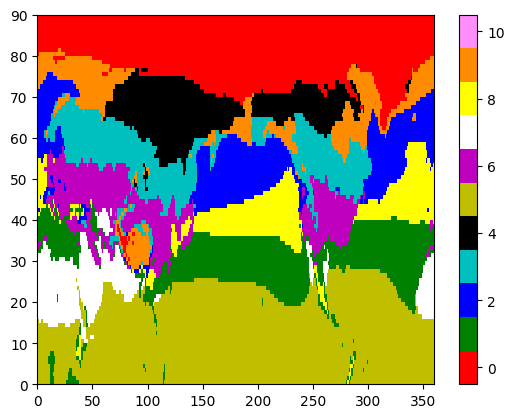

In [44]:
plt.pcolormesh(ds1.lon,ds1.lat[90:],x,cmap=cmap,vmin=-0.5,vmax=10.5);plt.colorbar()